In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os,sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("C:\\Users\\putariza\\Documents\\Documents\\park\\parkinsons.csv")
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [8]:
set(df["PPE"].tolist())

{0.044539,
 0.056141,
 0.05761,
 0.068501,
 0.073581,
 0.075587,
 0.085569,
 0.086398,
 0.09147,
 0.091546,
 0.091604,
 0.093193,
 0.093534,
 0.095032,
 0.09622,
 0.09632,
 0.097336,
 0.098555,
 0.100881,
 0.101516,
 0.102706,
 0.103224,
 0.103561,
 0.105306,
 0.105993,
 0.106802,
 0.108514,
 0.112838,
 0.112856,
 0.112878,
 0.113942,
 0.11513,
 0.115515,
 0.11573,
 0.117399,
 0.119308,
 0.119652,
 0.120605,
 0.121777,
 0.123306,
 0.128872,
 0.130554,
 0.131728,
 0.132703,
 0.13305,
 0.133867,
 0.13412,
 0.135242,
 0.13639,
 0.138512,
 0.138868,
 0.141422,
 0.141929,
 0.141958,
 0.144105,
 0.144614,
 0.147403,
 0.147491,
 0.148569,
 0.151709,
 0.152428,
 0.156368,
 0.159777,
 0.160306,
 0.160376,
 0.160691,
 0.160809,
 0.160812,
 0.162999,
 0.163118,
 0.163755,
 0.164916,
 0.165827,
 0.168581,
 0.168895,
 0.169923,
 0.1701,
 0.170106,
 0.170633,
 0.173218,
 0.174152,
 0.174429,
 0.177275,
 0.177807,
 0.179677,
 0.180828,
 0.181988,
 0.183572,
 0.184067,
 0.184985,
 0.18558,
 0.185668,


In [9]:
for i in df.columns:
    print("*****************************************************************","i","**************************************************")
    print()
    print(set(df[i].tolist()))
    print()

***************************************************************** i **************************************************

{'phon_R01_S43_4', 'phon_R01_S37_5', 'phon_R01_S37_4', 'phon_R01_S17_3', 'phon_R01_S16_6', 'phon_R01_S21_2', 'phon_R01_S21_3', 'phon_R01_S10_1', 'phon_R01_S32_6', 'phon_R01_S07_5', 'phon_R01_S44_1', 'phon_R01_S02_4', 'phon_R01_S07_3', 'phon_R01_S07_2', 'phon_R01_S39_3', 'phon_R01_S05_6', 'phon_R01_S35_5', 'phon_R01_S24_1', 'phon_R01_S37_1', 'phon_R01_S19_3', 'phon_R01_S16_1', 'phon_R01_S13_1', 'phon_R01_S25_5', 'phon_R01_S25_6', 'phon_R01_S20_5', 'phon_R01_S37_3', 'phon_R01_S31_3', 'phon_R01_S05_1', 'phon_R01_S01_6', 'phon_R01_S19_1', 'phon_R01_S27_7', 'phon_R01_S33_1', 'phon_R01_S39_1', 'phon_R01_S21_5', 'phon_R01_S33_6', 'phon_R01_S21_1', 'phon_R01_S06_2', 'phon_R01_S22_1', 'phon_R01_S35_4', 'phon_R01_S20_6', 'phon_R01_S42_3', 'phon_R01_S26_1', 'phon_R01_S33_5', 'phon_R01_S32_2', 'phon_R01_S05_5', 'phon_R01_S08_6', 'phon_R01_S43_5', 'phon_R01_S21_4', 'phon_R01_S50_4

In [10]:
temp=df["status"].value_counts()
temp_df=pd.DataFrame({"status":temp.index,'values':temp.values})
temp_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Axes(0.125,0.11;0.775x0.77)


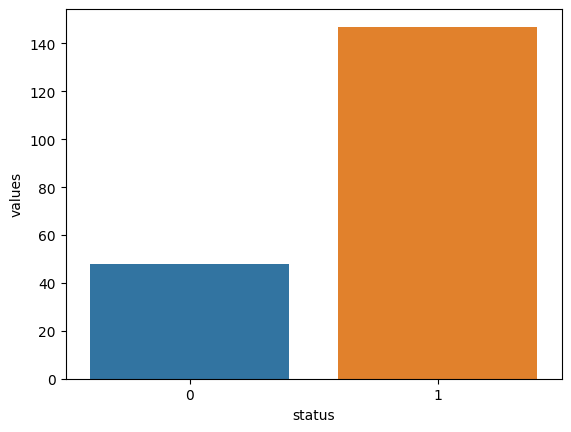

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

temp=df["status"].value_counts()
temp_df=pd.DataFrame({'status': temp.index,'values':temp.values})
print(sns.barplot(x='status',y='values',data=temp_df))

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
sns.distplot(df["PPE"])

In [ ]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

In [ ]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [ ]:
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

In [ ]:
ros=RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

In [ ]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [ ]:

from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=7)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

list_met=[]
list_accuracy=[]

#applying logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

classifier=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy_LR=accuracy_score(y_test,y_pred)

#applying decision tree
from sklearn.tree import DecisionTreeClassifier

classifier2=DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)
y_pred2=classifier2.predict(x_test)
accuracy_DT=accuracy_score(y_test,y_pred2)

#apply randomforest criteria information gain

from sklearn.ensemble import RandomForestClassifier

classifier3=RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train,y_train)
y_pred3=classifier3.predict(x_test)
accuracy_RFI=accuracy_score(y_test,y_pred3)

#apply random forest criteria=entropy

from sklearn.ensemble import RandomForestClassifier

classifier4=RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
y_pred4=classifier4.predict(x_test)
accuracy_RFE=accuracy_score(y_test,y_pred4)

#apply svm

from sklearn.svm import SVC
model_svm=SVC(cache_size=100)
svm=model_svm.fit(x_train,y_train)
y_pred5=model_svm.predict(x_test)
accuracy_svc=accuracy_score(y_test,y_pred5)

#apply knn

from sklearn.neighbors import KNeighborsClassifier

model_knn3=KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
pred_knn3=model_knn3.predict(x_test)
accuracy_SVM=accuracy_score(y_test,pred_knn3)

#apply gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb=gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
accuracy_GNB=accuracy_score(y_test,pred_gnb)

#apply bernoulli naive bayes

from sklearn.naive_bayes import BernoulliNB

model=BernoulliNB()
bnb=model.fit(x_train,y_train)
pred_bnb=model.predict(x_test)
accuracy_BNB=accuracy_score(y_test,pred_bnb)

#combining all the above usng voting classifier

from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('lr',lr),('rfi',rfi),('rfe',rfe),('DT',dt),('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',flatten_transform=True)
model_evc=evc.fit(x_train,y_train)
pred_evc=evc.predict(x_test)
accuracy_evc=accuracy_score(y_test,pred_gnb)

list1=['Logistic Regression','decision tree','Random forest(information gain)','Random forest(Entropy)','SVM','KNN','gnb','bnb','evc']
list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy':list2})
print(df_Accuracy)


chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

                







In [ ]:
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

In [ ]:
y_pred=model_xg.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xg.predict(x_test))

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,model_xg.predict(x_test),average='binary')


In [ ]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,model_xg.predict(x_test)))
print("Confusion matrix :")
print(cm)

In [ ]:
for i in list3:
    print("*********************",i,"******************")
    print(classification_report(y_test,i.predict(x_test)))
    print("Confusion matrix :")
    print(confusion_matrix(y_test,i.predict(x_test)))
    print()

In [ ]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

def plot_roc(model,X_test,y_test):
    probabilities=model.predict_proba(np.array(X_test))
    predictions=probabilities
    fpr,tpr,threshold=roc_curve(y_test,predictions[:,1])
    roc_auc=auc(fpr,tpr)
    
    plt.title('receiver operating characteristic')
    plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True positive rate')
    plt.xlabel('false positive rate')
    plt.show()

In [ ]:
plot_roc(model_xg,x_test,y_test)

In [ ]:
for i in range(0,len(list3)):
    try:
        print()
        print("-------------------ROC FOR",list1[i],"+ PCA------------------------")
        plot_roc(list3[i],x_test,np.array(y_test))
        print()
    except:
        print("roc no valid")
    

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))


In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn3=KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
pred_knn3=model_knn3.predict(x_test)


In [ ]:
predictions=model_knn3.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(y_test, predictions)

In [ ]:
f1_score(y_test, predictions)

In [ ]:
import pickle
with open('model_knn3.sav','wb')as f:
    pickle.dump(model_knn3,f)
with open('standardscalar.sav','wb')as f:
    pickle.dump(scaler,f)
    
